In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
data = pd.read_csv("Harvey_Tweets_with_emotion.csv")
data_neg_emotion = pd.read_csv("Harvey_stressor.csv")

In [24]:
plot_data=data.groupby(['Emotion']).count()["Tweet"]
plot_data = pd.DataFrame({'Emotion':plot_data.index, 'Tweet_count':plot_data.values})
plot_data = plot_data.sort_values(by=['Tweet_count'], ascending=False)

In [89]:
import matplotlib
from matplotlib import cm
from matplotlib.colors import rgb2hex

In [101]:
def select_color_palette (color,intervals,reverse = False):
    
    #get mathplotlib color with selection of color gradient
    cmap = matplotlib.colormaps[color]

    color_palette = []
    # round the number of color that would be used
    step_size = cmap.N // intervals
    
    for i in range(0,cmap.N,step_size):
        color_palette.append(np.delete(cmap(i), 3))
        
    # Check if the color value have yet changed to 255 scale
    if np.max(color_palette) < 1.00001:
        color_palette = np.round(np.array(color_palette)*255)
        
     # Mathplotlib use RGB, while OpenCV use BGR, so the color need to be reversed
    color_palette = color_palette[...,::-1]
    
    if reverse == True:
        color_palette = np.flip(color_palette)
        
    return color_palette

def rgb_to_hex(rgb_values):
    hex_values = []
    for rgb in rgb_values:
        hex_values.append('#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2]))
    return np.array(hex_values)


['#3b1230' '#792d3a' '#ac4641' '#d35e45' '#ee7647' '#fd8c45' '#fca33a'
 '#eeb92a' '#d8cd1c' '#c0de18' '#aaeb22' '#8ef53c' '#6ffc5d' '#53ff80'
 '#3ffd9f' '#35f7b7' '#34eccd' '#37dde1' '#3acbf1' '#38b8fb' '#30a1fe'
 '#2587fc' '#196cf6' '#0f53ec' '#083fdf' '#042dce' '#021eb9' '#0112a1'
 '#020785']


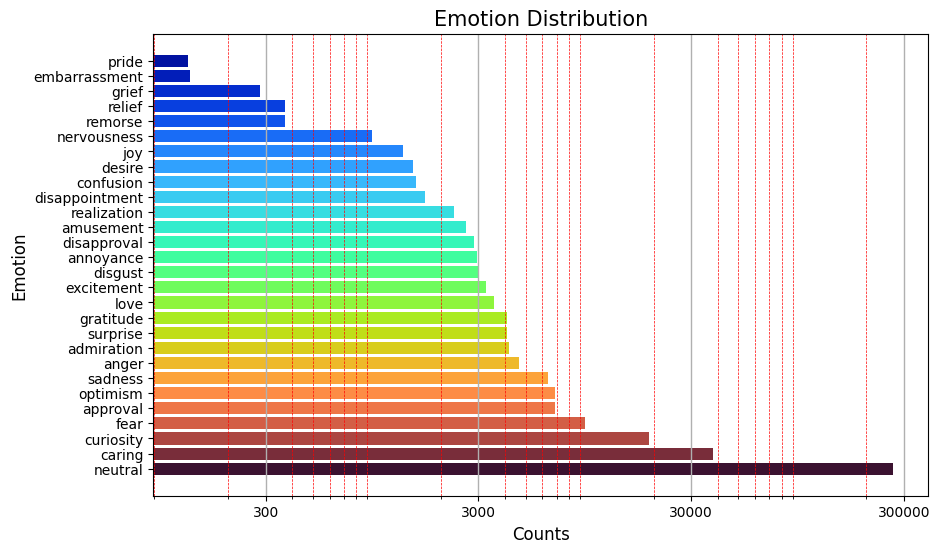

In [107]:
x=plot_data["Emotion"].to_list()
y=plot_data["Tweet_count"].to_list()

my_cmap = select_color_palette("turbo",len(x))
my_cmap = np.array(my_cmap, dtype=int)

colors = rgb_to_hex(my_cmap)

print(colors)


fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.barh(x, y,color = colors)
ax1.set_xscale('log')
ax1.set_xticks([300, 3000, 30000, 300000])
ax1.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

plt.grid(axis = 'x', which ='major',linestyle='-', linewidth=1)
plt.grid(axis = 'x', which ='minor',linestyle='--',color='r',linewidth=0.5)
plt.title("Emotion Distribution", fontsize=15)
plt.ylabel('Emotion', fontsize=12)
plt.xlabel('Counts', fontsize=12)

plt.show()

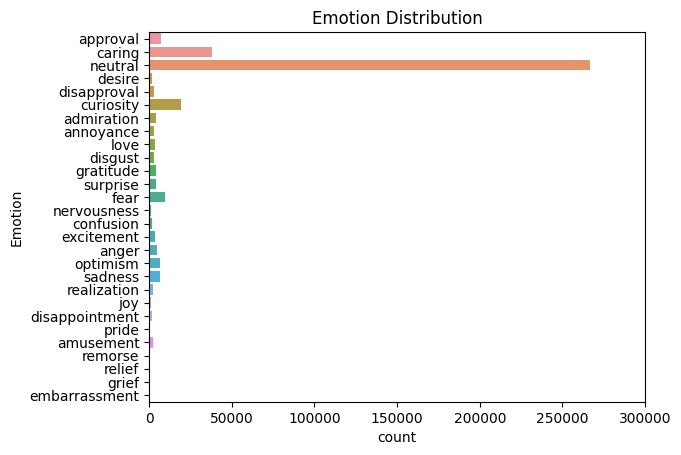

In [3]:
fig, ax = plt.subplots()
sns.countplot(data = data, y = 'Emotion', ax=ax).set_title("Emotion Distribution")
ax.set_xlim(0,300000)
plt.show()

In [4]:
occur = data_neg_emotion.groupby(['Emotion']).size()
df2=data_neg_emotion.groupby(['Emotion'])[['Likes','Replies','Retweets']].describe()

df2['Tweet_count'] = occur

In [5]:
df2 = df2.sort_values(by=['Tweet_count'], ascending=False)
# df2.to_csv('Stressor_summary.csv',index=True)
df2

PermissionError: [Errno 13] Permission denied: 'Stressor_summary.csv'